In [1]:
!conda info


     active environment : entorn_ML
    active env location : C:\temp\anaconda3\envs\entorn_ML
            shell level : 2
       user config file : C:\Users\iñaki\.condarc
 populated config files : C:\Users\iñaki\.condarc
          conda version : 23.9.0
    conda-build version : 3.26.1
         python version : 3.11.5.final.0
       virtual packages : __archspec=1=x86_64
                          __win=0=0
       base environment : C:\temp\anaconda3  (writable)
      conda av data dir : C:\temp\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/win-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https:

# EDA para datos bank_dataset.csv
## Características y variables

Input variables: # bank client data:

1. - age (numeric)
2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. - education (categorical: "unknown","secondary","primary","tertiary")
5. - default: has credit in default? (binary: "yes","no")
6. - balance: average yearly balance, in euros (numeric)
7. - housing: has housing loan? (binary: "yes","no")
8. - loan: has personal loan? (binary: "yes","no") # related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: "unknown","telephone","cellular")
10. - day: last contact day of the month (numeric)
11. - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. - duration: last contact duration, in seconds (numeric) # other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")


## 1)	Estadístics descriptius de les dades del Dataset
### A continuació mostrem el tipus de les característiques i els estadístics del dataset (mitjana, moda, min, max, quartils, etc...) tant de les dades contínues com de les categòriques

In [2]:
# Importem les llibreries q necessitarem

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Carreguem el Dataset a tractar
df_inicial = pd.read_csv('D:\OneDrive\Documents\Iñaki\Cursos\ML 11-1-2024\Sprint 5\\Bank_dataset.CSV')

print("\n Tipus de Dades al dataset","\n")
df_inicial.info()

print()


 Tipus de Dades al dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB



#### Encara q la característica pdays és numérica, té una característica categòrica (-1), on el valor de -1 indica un contacte no realitzat en cap moment i el valor numéric diferent de -1 el nombre de dies passats després de un primer contacte. Per això, ho separarem en 2 columnes, una 'contacte_anterior' per els valors de pdays=-1 i 'dies_despres_contacte' (valors >=0) 


In [3]:
#Fem una còpia del dataframe inicial per transformar-lo
df=df_inicial.copy()

# Separar les files amb pdays = -1
df['contacte_anterior'] = df['pdays'].apply(lambda x: 'SI' if x == -1 else 'NO')

# Separar les files amb pdays diferents de -1
# Passem el tipus de dades a Int64 ja que suporta valors Nan
df['dies_despres_contacte'] = df['pdays'].replace(-1, pd.NA).astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    11152 non-null  float64
 1   job                    11162 non-null  object 
 2   marital                11157 non-null  object 
 3   education              11155 non-null  object 
 4   default                11162 non-null  object 
 5   balance                11162 non-null  int64  
 6   housing                11162 non-null  object 
 7   loan                   11162 non-null  object 
 8   contact                11162 non-null  object 
 9   day                    11162 non-null  int64  
 10  month                  11162 non-null  object 
 11  duration               11162 non-null  int64  
 12  campaign               11162 non-null  int64  
 13  pdays                  11162 non-null  int64  
 14  previous               11162 non-null  int64  
 15  po

In [4]:
print("Dades de característiques contínues","\n")
display(df.describe())

# Describir solo las variables categóricas
print("Dades de característiques categòriques","\n")
display(df.describe(include='object'))    

Dades de característiques contínues 



,age,balance,day,duration,campaign,pdays,previous,dies_despres_contacte
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,2838.0
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,204.818182
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,122.196901
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,1.0
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,98.0
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,182.0
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,286.0
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,854.0


Dades de característiques categòriques 



,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,contacte_anterior
count,11162,11157,11155,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no,SI
freq,2566,6349,5474,10994,5881,9702,8042,2824,8326,5873,8324


### Observem que hi han 11162 registres al Dataset, però hi han característiques que no estan definides en tots els 11162 registres (ex: falten 10 registres de age, 5 de marital i 7 de Education,es a dir, 22 registres amb alguna dada faltant)
### Aixímateix, el nombre de dies després d'un contacte anterior només té dades en 2.838 registres, en els altres no s'ha contactat al client abans
### Visualitzem si són correctes algunes dades recollides veient els valors dels descriptius i els histogrames

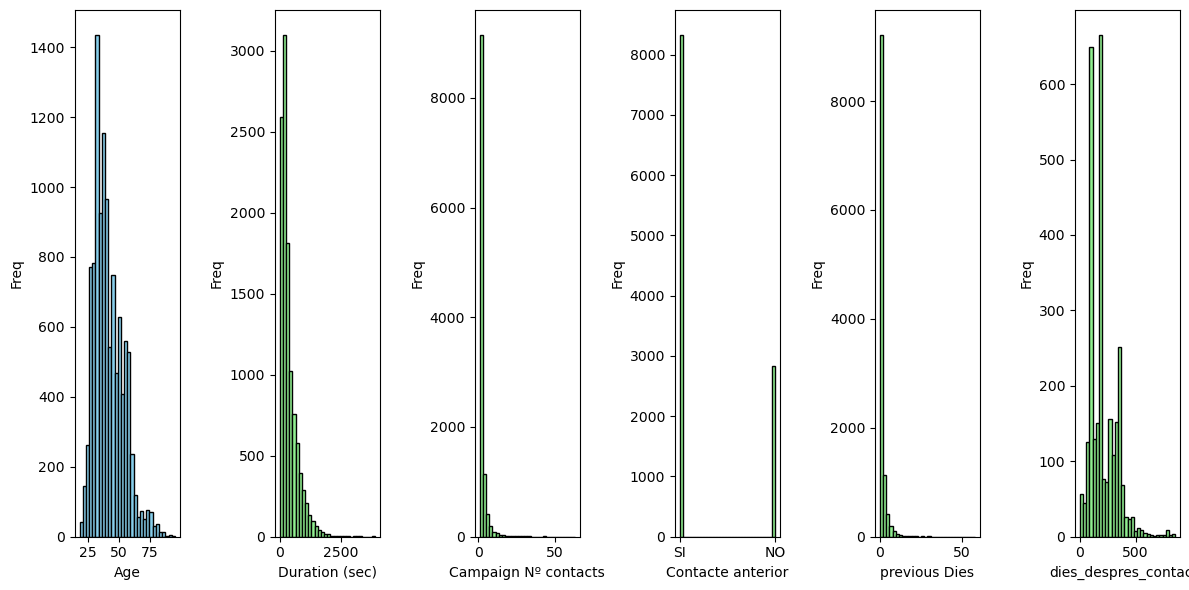

Top 10 age=  1582     95.0
3756     93.0
3822     93.0
2802     92.0
3098     92.0
1243     90.0
3292     90.0
9430     89.0
5521     88.0
10562    88.0
Name: age, dtype: float64
Top 10 Duration=  271     3881
7198    3284
883     3253
358     3183
4364    3102
153     3094
1351    3076
1179    2775
1106    2770
306     2769
Name: duration, dtype: int64
Top 10 campaign= 7635     63
6927     43
7240     43
7139     41
9683     33
4912     32
7237     32
10293    31
7763     30
10865    30
Name: campaign, dtype: int64  contacts


In [5]:
# Crear histogramas de 'age' y 'duration'
plt.figure(figsize=(12, 6))

# Histograma de 'age'
plt.subplot(1, 6, 1)
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
#plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')

# Histograma de 'duration'
plt.subplot(1, 6, 2)
plt.hist(df['duration'].dropna(), bins=30, color='lightgreen', edgecolor='black')
#plt.title('Histogram of Duration')
plt.xlabel('Duration (sec)')
plt.ylabel('Freq')

# Histograma de 'campaign'
plt.subplot(1, 6, 3)
plt.hist(df['campaign'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Campaign Nº contacts')
plt.ylabel('Freq')

# Histograma de 'contacte_anterior' contacte SI o NO'
plt.subplot(1, 6, 4)
plt.hist(df['contacte_anterior'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Contacte anterior')
plt.ylabel('Freq')

# Histograma de 'previous'
plt.subplot(1, 6, 5)
plt.hist(df['previous'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('previous Dies')
plt.ylabel('Freq')


# Histograma de 'dies_despres_contacte'
plt.subplot(1, 6, 6)
plt.hist(df['dies_despres_contacte'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('dies_despres_contacte')
plt.ylabel('Freq')

# Mostrar els histogrames
plt.tight_layout()
plt.show()

#Top 10 Age
top_10_age = df['age'].nlargest(10)
print("Top 10 age= ",top_10_age)

#Top 10 Duration
top_10_duration = df['duration'].nlargest(10)
print("Top 10 Duration= ",top_10_duration)

#Top 10 Campaign
top_10_campaign = df['campaign'].nlargest(10)
print("Top 10 campaign=",top_10_campaign," contacts")



### és molt probable que hi hagin valors Outliers en aquestes característiques;els tractarem més endevant

## 2)	Identificació dels valors faltants i tècniques x gestionar-los, fent una justificació breu de les decisions preses
### A continuació mostrem els valors faltants (NaN)

In [6]:
# Mostrar files amb almenys una cel·la nul·la
files_amb_null = df_inicial[df_inicial.isnull().any(axis=1)]

print("Fil·les amb valors nuls= ",len(files_amb_null))
display(files_amb_null)

#Hi han tantes files nules degut a que en contactes que no s'havien produït amb anterioritat (pdays=-1), la nova columna dies_despres_contacte té valors Nan per substituir els valors de pdays=-1


Fil·les amb valors nuls=  22


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1300,37.0,technician,married,NaN,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
2943,24.0,student,single,NaN,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
4737,37.0,management,single,NaN,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no


### Per poder utilitzar les fil·les amb cel·les amb valors Nulls, podríem escollir diverses estratègies:
1. Esborrar les fil·les amb cel·les amb valors Nulls del Dataset a tractar
2. En aquest exercici, l'estratègia serà susbtituir els valors nulls per la moda en les característiques contínues, en la nova característica  i en la categòrica 'marital' i 'education' 

In [7]:
# Substituir valors nuls de 'age' per la moda
moda_age = df['age'].mode()[0]
print("Moda age= ",moda_age)
df['age'].fillna(moda_age, inplace=True)

# Substituir valors nuls de 'education' per la moda
moda_education = df['education'].mode()[0]
print("Moda education= ",moda_education)
df['education'].fillna(moda_education, inplace=True)

# Substituir valors nuls de 'marital' per la moda
moda_marital = df['marital'].mode()[0]
print("Moda marital= ",moda_marital)
df['marital'].fillna(moda_marital, inplace=True)

# Mostrar files amb almenys una cel·la nul·la
files_amb_null = df[df.isnull().any(axis=1)]


display(files_amb_null)
print("\n Fil·les amb valors nuls= ",len(files_amb_null))

Moda age=  31.0
Moda education=  secondary
Moda marital=  married


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,contacte_anterior,dies_despres_contacte
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,SI,<NA>
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,SI,<NA>
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,SI,<NA>
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,SI,<NA>
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,SI,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34.0,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no,SI,<NA>
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,SI,<NA>
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,SI,<NA>
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,SI,<NA>



 Fil·les amb valors nuls=  8324


## 3)	Identificació de Outliers en les variables rellevants, amb estratègia de tractament aplicada

### Aplicarem el mètode Z-score per detectar els outliers a les columnes campaign i previous del Dataframe. El Z-score mesura quantes desviacions estàndard es troba un valor per sobre o per sota de la mitjana. Normalment, es consideren outliers els valors amb un Z-score superior a 3 o inferior a -3.


In [8]:
from scipy import stats   #Per calcular el Z-score

# Calcular el Z-score per a les columnes 'campaign' i 'previous'
df['z_campaign'] = stats.zscore(df['campaign'])
df['z_previous'] = stats.zscore(df['previous'])

# Filtrar els outliers amb Z-score > 3 o < -3 per 'campaign'
outliers_campaign = df[(df['z_campaign'] > 3) | (df['z_campaign'] < -3)]
print("\nOutliers en la columna 'campaign':")
print(outliers_campaign[['campaign', 'z_campaign']])

# Filtrar els outliers amb Z-score > 3 o < -3 per 'previous'
outliers_previous = df[(df['z_previous'] > 3) | (df['z_previous'] < -3)]
print("\nOutliers en la columna 'previous':")
print(outliers_previous[['previous', 'z_previous']])


Outliers en la columna 'campaign':
       campaign  z_campaign
135          11    3.119661
187          15    4.589193
196          12    3.487044
197          12    3.487044
212          14    4.221810
...         ...         ...
10932        30   10.099938
10960        30   10.099938
10993        20    6.426108
11074        12    3.487044
11140        17    5.323959

[210 rows x 2 columns]

Outliers en la columna 'previous':
       previous  z_previous
1007         10    3.999924
1062          9    3.563605
1185         29   12.289972
1383         13    5.308879
1408         17    7.054152
...         ...         ...
10817         8    3.127287
10822         8    3.127287
10967        17    7.054152
11007        12    4.872560
11054         8    3.127287

[220 rows x 2 columns]


### Substituirem els Outliers per la mitjana

In [9]:
# Substituir outliers a 'campaign' per la mitjana
mitjana_campaign = df['campaign'].mean()
df.loc[df['z_campaign'].abs() > 3, 'campaign'] = mitjana_campaign
print(f"Mitjana Campaign= {mitjana_campaign}")

# Substituir outliers a 'previous' per la mediana
mitjana_previous = df['previous'].mean()
df.loc[df['z_previous'].abs() > 3, 'previous'] = mitjana_previous
print(f"Mitjana previous= {mitjana_previous}")

Mitjana Campaign= 2.508421429851281
Mitjana previous= 0.8325568894463358


## 4) Anàlisi de les relacions entre característiques i variables objectius, aplicant mètodes estadístics i visual  elecció de les més rellevants
### Aplicarem el mètode visual de correlació inclòs a la llibreria Seaborn per visualitzar les relacions (positives o negatives) més fortes entre característiques i la variable objectiu diposit; per això, haurem de transformar anteriorment les variables categòriques a numèriques 

In [10]:
#Fem una còpia del Dataset original
df2=df.copy()

#llistem els registres amb valors unknown education, contact i poutcome

unknown_counts = {
    'education': (df['education'] == 'unknown').sum(),
    'contact': (df['contact'] == 'unknown').sum(),
    'poutcome': (df['poutcome'] == 'unknown').sum()
}

# Mostrar els resultats
print(unknown_counts)

#Decidim no incloure aquests registres en l'anàlisi de correlació per trobar les majors correlacions entre les característiques
#i la variable diposit ja que són molts registres dels que no disposem informació

{'education': 496, 'contact': 2346, 'poutcome': 8326}


DataFrame original:


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,contacte_anterior,dies_despres_contacte,z_campaign,z_previous
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1042,1.0,-1,0.0,unknown,yes,SI,<NA>,-0.554168,-0.36326
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,...,1467,1.0,-1,0.0,unknown,yes,SI,<NA>,-0.554168,-0.36326
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,...,1389,1.0,-1,0.0,unknown,yes,SI,<NA>,-0.554168,-0.36326
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,...,579,1.0,-1,0.0,unknown,yes,SI,<NA>,-0.554168,-0.36326
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,...,673,2.0,-1,0.0,unknown,yes,SI,<NA>,-0.186785,-0.36326



DataFrame amb columnes categoriques convertides a numèriques:


,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59.0,1,1,1,2343,1,1,5,1,1042,1.0,-1,0.0,1
1,56.0,1,1,1,45,2,1,5,1,1467,1.0,-1,0.0,1
2,41.0,2,1,1,1270,1,1,5,1,1389,1.0,-1,0.0,1
3,55.0,3,1,1,2476,1,1,5,1,579,1.0,-1,0.0,1
4,54.0,1,1,1,184,2,1,5,1,673,2.0,-1,0.0,1


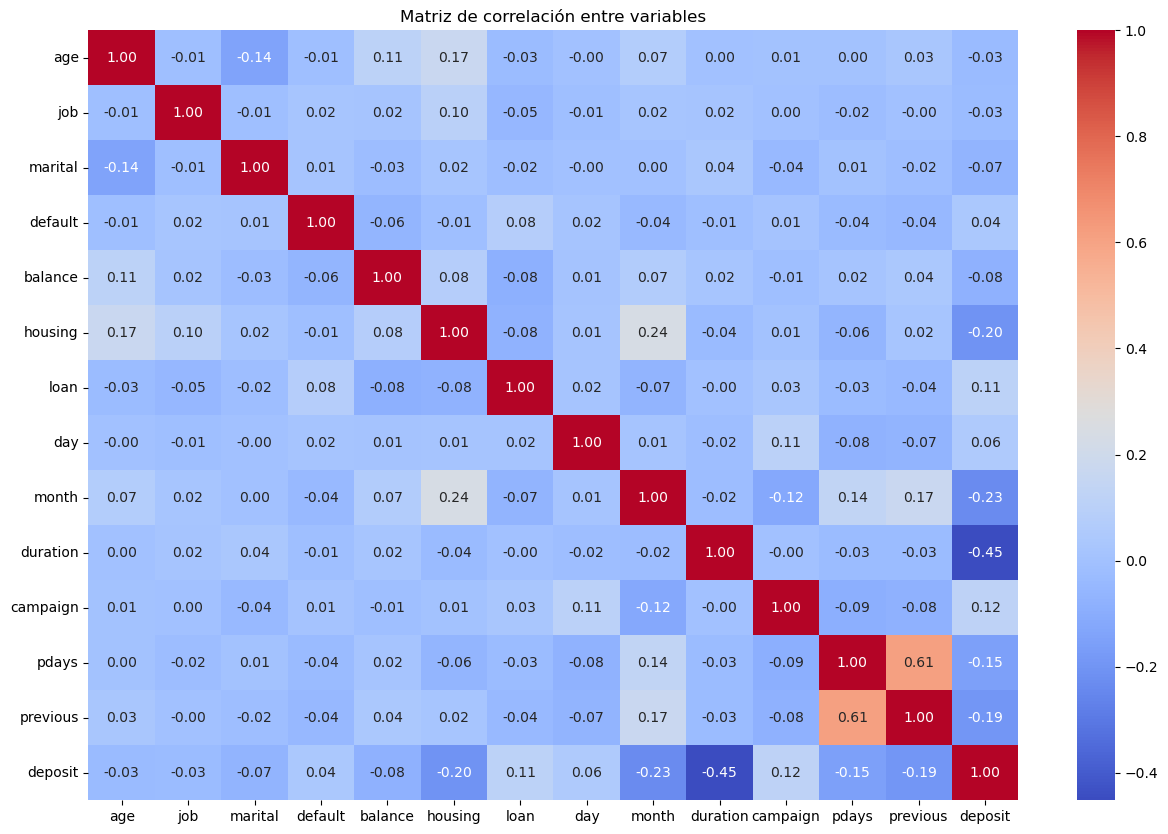

In [11]:
# Convertir les característiques categòriques a numériques:

# Definir les columnes a eliminar de l'análisi
columnes_a_eliminar = ['contacte_anterior', 'dies_despres_contacte', 'z_campaign', 'z_previous','education', 'contact', 'poutcome']

# Seleccionar totes les columnes menys les especificades
df2= df2.drop(columns=columnes_a_eliminar)

# Convertim les característiques categòriques a numériques en totes les columnes excepte les excloses:
for column in df2.select_dtypes(include=['object']).columns:
    # Creem un diccionari de mapeig per cada columna, començant des de 1
           
    unique_vals = df2[column].unique()
    mapping_dict = {val: idx + 1 for idx, val in enumerate(unique_vals)}  # Comencem a l'1
        
    # Substituïm els valors categoriques per valors numèrics
    df2[column] = df2[column].map(mapping_dict)


# Mostrem el DataFrame original
print('DataFrame original:')
display(df.head())

# Calculem la matriu de correlació

# Mostrem les primeres files del DataFrame seleccionat
print('\nDataFrame amb columnes categoriques convertides a numèriques:')
df_num = df2.select_dtypes(include=['float64', 'int64'])
display (df_num.head())
correlation_matrix = df_num.corr()

# Mostrar la matriu de correlació com un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

#### Observem del gràfic de correlacions que les característiques amb major influència sobre la variable objectiu diposit (tant positives com negatives són duration (duració del darrer contacte) ,month (mes del darrer contacte),  housing (si ja te una hipoteca prèvia) i previous (nombre de contactes realitzat abans d'aquesta campanya)


### 5)	Anàlisi de la distribució de la variable objectiu x identificar desbalançaments

#### Visualitzant el dataframe, observem que hi han varies característiques que presenten un clar desbalançament respecte la variable objectiu, ja que no disposem de valors definits en molts registres. 
#### L'estratègia seguida ha estat la de no tenir en compte aquestes característiques en l'anàlisi de correlacions de característiques

### 6)	Resum del projecte

#### Després de realitzar l'anàlisi del Dataset, de les característiques i de la matriu de correlacions de característiques respecte la variable objectiu diposit observem que:

##### -Hi han una sèrie de característiques categòriques que haurem de transformar en numériques per aplicar l'anàlisi de correlacions
##### -Hem de susbtituir els valors NaN de les característiques del Dataset (en aquest cas, seleccionem la moda com el valor substitut)
##### -Identifiquem els Outliers amb Z-score de les característiques del Dataset i els substituïm per la mitjana.
##### -Eliminem del càlcul de la matriu de correlació de característiques aquelles que tenen gran conjunt de registres no definits ('unkown')
##### -Analitzem la matriu de correlació i trobem les característiques més influents sobre la variable diposit (valor més gran, tant negatiu com positiu) que en aquest dataset son duration, month, housing i previous